In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math

In [41]:
#распределение Парето
#посчитаем среднее и дисперсию
xm=1.#минимальное значение
b=4.# это параметр b - "коэффициент кривизны"
E=(xm*b)/(b-1)#среднее(мат ожидание)
D=(E**2)*(b/(b-2))#дисперсия
pareto=sts.pareto(b)
print E
print D

1.33333333333
3.55555555556


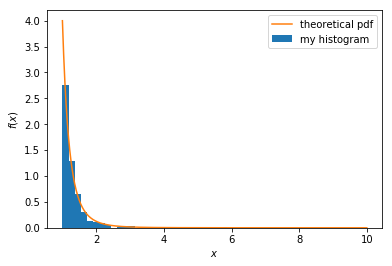

In [42]:
# выборка на 1000 элементов
sample = pareto.rvs(size=1000)
# на отрезке [1, 10] строим:
x = np.linspace(1,10,1000)
# гистограмму
pdf = pareto.pdf(x)
plt.hist(sample, bins=50, range=(1,10), normed=True, label='my histogram')
# pdf
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

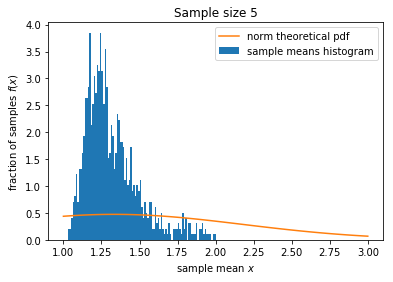

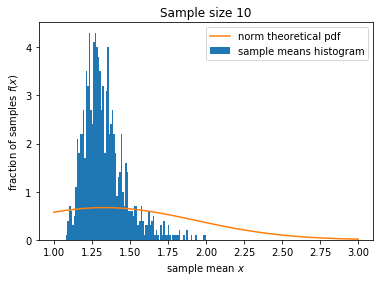

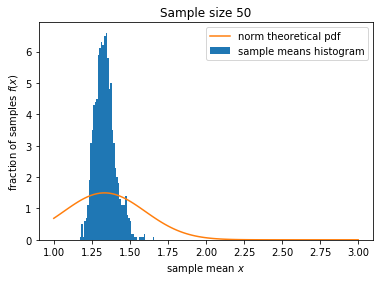

In [48]:
# для выборок размера n
for n in [5, 10, 50]:
    # вычисляется сдеднее из 1000 выборок
    sigma=math.sqrt(D/n)
    sample_means = []
    for rvn in range(1000):
        sample_means.append(pareto.rvs(n).mean())
    # и вырисовывается на графике
    plt.hist(sample_means, 100, normed=True, range=[1, 2], label='sample means histogram')
    # вычисляется pdf нормального распределения с данными параметрами (каждый раз одинково)
    norm_rv = sts.norm(E,sigma)
    x = np.linspace(1, 3, 100)
    pdf = norm_rv.pdf(x)
    # и вырисовывается на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    # легенда графика
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

Для выполнения задания была выбрана функция распределения Парето (наугад из списка доступных в SciPy). Были выполнены условия задачи: построены для четырех разных n (5, 10, 50) по 1000 случайных выборок, измерены их выборочные средние и составлены соостветствующие массивы, по массивам выборочных средних построены гистограммы распределения, исходя из теоретических данных определены соответствующие каждому n параметры распределений для апроксимации, по полученным параметрам построены функции нормального распределения для каждого n поверх соответствующих гистограмм.

По полученным графикам наблюдается увелечение точности апроксимации выборочного среднего значения непрерывной случайной величины описываемой распределением Парето, хотя и в итоговый результат внесены искажения из-за особенностей функции Парето, главным из которых является граница значений, что приводит к ограничению искомой апроксимирующей функции. Так же заметна скошенность проявляющаяся в несимметричности распределения относительно центра. Из-за перечисленных недостатков функция сходится медленно, и более качественный результат наблюдается при больших n, в нашем случае при n = 50.